# TUGAS LAB 4 DSA NO.2

##    Nama : Aldo Bima Syahputra
##    NPM   : 1606833463
##    Kelas : A

# Read Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_json('Sentiment/data_latih.json')

In [3]:
data_train.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,Tue Apr 04 13:50:01 +0000 2017


# Preprocessing

## Lower Case

In [4]:
data_train['isi'] = data_train['isi'].apply(lambda x: x.lower())

In [5]:
data_train.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,rt @ahokdjarot: penasaran sama #basukidjarot? ...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,@ahokdjarot melayani warga jakarta mulai dari ...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,@lintank01 @ahokdjarot golongan sumbu pendek l...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,rt @rahyamaya: https://t.co/pvvuip3yyw pak aho...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,prof. edward omar sharif h. (ahli pidana) : me...,positif,Tue Apr 04 13:50:01 +0000 2017


## Remove URL

In [6]:
import re

data_train['isi'] = data_train['isi'].apply(lambda x: re.sub(r'https[\S]*','',x))

In [7]:
data_train.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,rt @ahokdjarot: penasaran sama #basukidjarot? ...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,@ahokdjarot melayani warga jakarta mulai dari ...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,@lintank01 @ahokdjarot golongan sumbu pendek l...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,rt @rahyamaya: pak ahok itu didzolimi... aku ...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,prof. edward omar sharif h. (ahli pidana) : me...,positif,Tue Apr 04 13:50:01 +0000 2017


## Remove Punctuation and Multiple Whitespaces

In [8]:
import string
data_train['isi'] = data_train['isi'].apply(lambda x: re.sub('['+string.punctuation+']','',x))
data_train['isi'] = data_train['isi'].apply(lambda x: re.sub(r'[\s]{2,}',' ',x))

In [9]:
data_train.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,rt ahokdjarot penasaran sama basukidjarot puny...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,ahokdjarot melayani warga jakarta mulai dari l...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,lintank01 ahokdjarot golongan sumbu pendek lo ...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,rt rahyamaya pak ahok itu didzolimi aku yakin ...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,prof edward omar sharif h ahli pidana menurut ...,positif,Tue Apr 04 13:50:01 +0000 2017


## Ganti kata baku

In [10]:
def get_formal_word(kata,keynorm):
    if kata in keynorm['singkat'].values:
        return keynorm.loc[keynorm['singkat'] == kata].hasil.item()
    return kata

def formalize_sentence(s,keynorm):
    words = s.split()
    resultwords  = [get_formal_word(word, keynorm) for word in words]
    result = ' '.join(resultwords)
    return result    

In [11]:
keynorm = pd.read_csv('Sentiment/key_norm.csv')

a = data_train['isi'].apply(lambda x: formalize_sentence(x,keynorm))

In [12]:
data_train['isi'] = a

In [13]:
data_train.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,rt ahokdjarot penasaran sama basukidjarot puny...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,ahokdjarot melayani warga jakarta mulai dari l...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,lintank01 ahokdjarot golongan sumbu pendek kam...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,rt rahyamaya pak ahok itu didzolimi saya yakin...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,prof edward omar sharif h ahli pidana menurut ...,positif,Tue Apr 04 13:50:01 +0000 2017


## Stemming

In [14]:
#create function for stemming
def stem_sentence(s,stemmer) :
    words = s.split()
    resultwords  = [ stemmer.stem(word) for word in words]
    result = ' '.join(resultwords)
    return result

In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

a = data_train['isi'].apply(lambda x: stem_sentence(x,stemmer))

In [16]:
data_train['isi'] = a

In [17]:
data_train.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,rt ahokdjarot penasaran sama basukidjarot puny...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,ahokdjarot layan warga jakarta mulai dari lahi...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,lintank01 ahokdjarot golong sumbu pendek kamu ...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,rt rahyamaya pak ahok itu didzolimi saya yakin...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,prof edward omar sharif h ahli pidana turut pn...,positif,Tue Apr 04 13:50:01 +0000 2017


## Remove Stopwords

In [18]:
#fetch list of stopwords into set
with open('Sentiment/stopword_list_TALA.txt', 'r') as stopword_file:
    stopwords = set(map(lambda x : x.strip(), stopword_file.readlines()))
    print(stopwords)

{'semisalnya', 'rt', 'amatlah', 'mengerjakan', 'waduh', 'ditunjuki', 'kepadanya', 'seketika', 'digunakan', 'keduanya', 'mengapa', 'sebaik-baiknya', 'katakan', 'bukannya', 'hingga', 'merasa', 'demi', 'boleh', 'atau', 'seterusnya', 'tadinya', 'segala', 'katakanlah', 'waktunya', 'beri', 'berujar', 'aku', 'berkenaan', 'belakangan', 'kapan', 'seorang', 'menanya', 'hendaknya', 'berakhir', 'tunjuk', 'seberapa', 'pertama-tama', 'jikalau', 'menyatakan', 'betulkah', 'bersiap', 'cara', 'diingat', 'menegaskan', 'suatu', 'mungkin', 'bila', 'dimaksudkannya', 'tidak', 'dulu', 'dimaksud', 'ternyata', 'sebut', 'teringat-ingat', 'sepantasnya', 'khususnya', 'sejenak', 'siapa', 'jawab', 'soalnya', 'mau', 'bagian', 'jauh', 'meyakini', 'semasa', 'sepantasnyalah', 'sebisanya', 'memulai', 'sayalah', 'anda', 'jawabnya', 'keluar', 'namun', 'jumlahnya', 'dipastikan', 'menandaskan', 'sebutnya', 'satu', 'artinya', 'tersampaikan', 'ingat-ingat', 'diakhiri', 'bulan', 'berakhirlah', 'kebetulan', 'mengira', 'sebaik', 

In [19]:
#create function for removing stopwords
def remove_stopwords(s,stopwords) :
    words = s.split()
    resultwords  = [word for word in words if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    return result

In [20]:
data_train['isi'] = data_train['isi'].apply(lambda x: remove_stopwords(x,stopwords))

In [21]:
data_train.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,ahokdjarot penasaran basukidjarot pertanyaanke...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,ahokdjarot layan warga jakarta lahir program f...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,lintank01 ahokdjarot golong sumbu pendek fpi p...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,rahyamaya ahok didzolimi ahok bebas freeahok b...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,prof edward omar sharif h ahli pidana pndpt ah...,positif,Tue Apr 04 13:50:01 +0000 2017


# Word Cloud

In [22]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

## Categorize words from pos, neg, and neutral sentiment

In [23]:
neg_words = ''
pos_words = ''
neutral_words = ''

for i in range(1,len(data_train)):
    if data_train.loc[i,'sentimen'] == 'netral' :
        neutral_words += data_train.loc[i,'isi'] + " "
    elif data_train.loc[i,'sentimen'] == 'positif' :
        pos_words += data_train.loc[i,'isi'] + " "
    elif data_train.loc[i,'sentimen'] == 'negatif' :
        neg_words += data_train.loc[i,'isi'] + " "

In [24]:
neg_words

'lintank01 ahokdjarot golong sumbu pendek fpi piara keluarga cendana bibib risiek ulama mesum demo kerja mudasirromini ahokdjarot ahok penjarabersih2 penjara biar ahok jakartakece fakta ahokdjarot wkwkwkada udang dbalik batu rahyamaya fakta basukibtp ahokdjarot dzolimi bgmana jelazz mendolimi umat islamsampean sehat rahyamaya fakta basukibtp ahokdjarot nista agama yaa jakarta bersyariah wujud aniesbaswedan jakarta berbhinneka pilih ahokdjarot masrilpku dukung ahokdjarot jujur bohong percaya sugiono999 kompastv rosianna766hi basukibtp ahokdjarot nya ya oke masrilpku ahokdjarot tribunnews bodoh dukung masrilpku dukung ahokdjarot jujur bohong percaya ibank03030245 mentimoen jktmajubersama anis fokuswacanaahokdjarot fokus kerjaanis programbasukibtp kerja aniesbaswedan sandiuno lempar handuk addiems ahokdjarot ahokdjarot ibukota jakarta milik buah golong milik jakartapunyasemua hahaha lucu lomba ya basukibtp ahokdjarot partaisocmed rawa metrotvtoday masrilpku dukung ahokdjarot jujur bohong 

## Wordcloud untuk sentimen positif

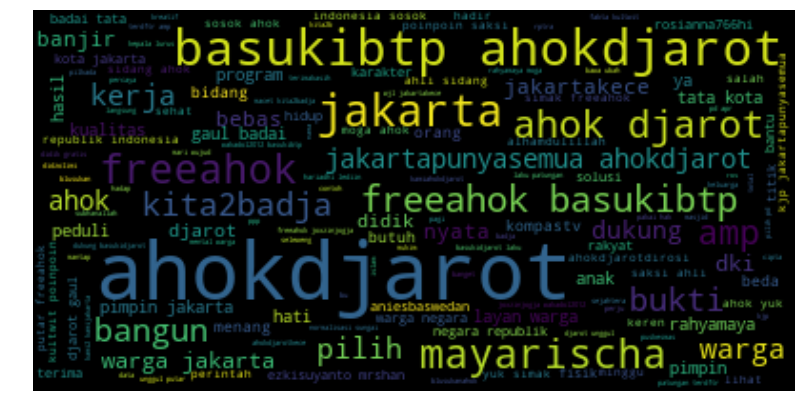

In [25]:
wordcloud = WordCloud(random_state=50).generate(pos_words)
plt.figure(figsize = (15,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Wordcloud untuk sentimen negatif

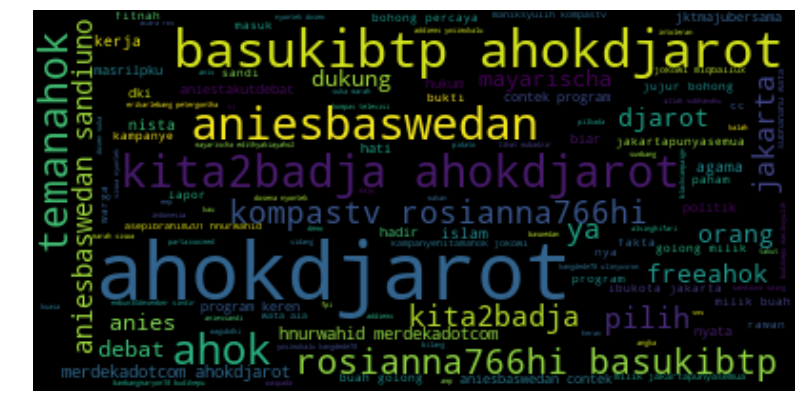

In [26]:
wordcloud = WordCloud(random_state=50).generate(neg_words)
plt.figure(figsize = (15,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Wordcloud untuk sentimen netral

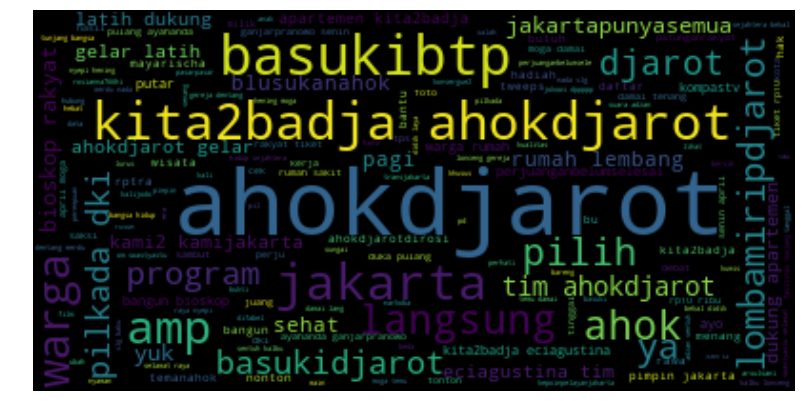

In [27]:
wordcloud = WordCloud(random_state=50).generate(neutral_words)
plt.figure(figsize = (15,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Feature Extraction

## Mengubah kolom sentimen menjadi numerikal

In [28]:
df_train = data_train
df_train.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,ahokdjarot penasaran basukidjarot pertanyaanke...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,ahokdjarot layan warga jakarta lahir program f...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,lintank01 ahokdjarot golong sumbu pendek fpi p...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,rahyamaya ahok didzolimi ahok bebas freeahok b...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,prof edward omar sharif h ahli pidana pndpt ah...,positif,Tue Apr 04 13:50:01 +0000 2017


In [29]:
#change label to numerical
factor = pd.factorize(df_train['sentimen'])
#will be used to change numerical label to actual label
data = factor[0]
definition = factor[1]
#changing the values of label
df_train.sentimen = data

In [30]:
df_train.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,ahokdjarot penasaran basukidjarot pertanyaanke...,0,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,ahokdjarot layan warga jakarta lahir program f...,1,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,lintank01 ahokdjarot golong sumbu pendek fpi p...,2,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,rahyamaya ahok didzolimi ahok bebas freeahok b...,1,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,prof edward omar sharif h ahli pidana pndpt ah...,1,Tue Apr 04 13:50:01 +0000 2017


## feature extraction using ngram(bigram) and tf idf 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# define vectorizer object
count_vect = CountVectorizer(analyzer='word', ngram_range=(2,2))

#converting the doc to matrix of token counts using CountVectorizer
count_vect.fit(df_train['isi'])
ngram_feat = count_vect.transform(df_train['isi'])

#ekstraksi fitur tf idf
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=4000, min_df=2) #inisiasi fungsi TF IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(df_train['isi'])

In [32]:
print(ngram_feat)

  (0, 324)	1
  (0, 704)	1
  (0, 1641)	1
  (0, 2307)	1
  (0, 2338)	1
  (0, 2354)	1
  (1, 278)	1
  (1, 1200)	1
  (1, 1451)	1
  (1, 1789)	1
  (1, 1831)	1
  (1, 2446)	1
  (1, 3129)	1
  (2, 224)	1
  (2, 784)	1
  (2, 921)	1
  (2, 1004)	1
  (2, 1198)	1
  (2, 1233)	1
  (2, 1616)	1
  (2, 1859)	1
  (2, 2014)	1
  (2, 2308)	1
  (2, 2342)	1
  (2, 2562)	1
  :	:
  (646, 1105)	1
  (646, 1120)	1
  (646, 1219)	1
  (646, 1819)	1
  (646, 2940)	1
  (647, 222)	1
  (647, 569)	1
  (647, 1105)	1
  (647, 1120)	1
  (647, 1219)	1
  (647, 1819)	1
  (647, 2940)	1
  (648, 222)	1
  (648, 569)	1
  (648, 1105)	1
  (648, 1120)	1
  (648, 1219)	1
  (648, 1819)	1
  (648, 2940)	1
  (649, 38)	1
  (649, 284)	1
  (649, 628)	1
  (649, 874)	1
  (649, 1887)	1
  (649, 2160)	1


# Klasifikasi

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
KNeighborsClassifier(3),
LogisticRegression(),
DecisionTreeClassifier()]

/home/syahbima/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Klasifikasi dengan fitur N-Gram (bigram)

In [34]:
ngram_scores = []
ngram_scores_mean = []

In [35]:
from sklearn.model_selection import cross_validate

for clf in classifiers:
    fold = cross_validate(clf, ngram_feat.toarray(),df_train['sentimen'], cv=10)
    ngram_scores.append(fold['test_score'])
    ngram_scores_mean.append(fold['test_score'].mean())

## Performance Comparison dengan Fitur N-Gram (bigram)

### KNeighborsClassifier

In [36]:
print('KNeighborsClassifier:\n',"scores : ",ngram_scores[0],"\n","mean :",ngram_scores_mean[0])

KNeighborsClassifier:
 scores :  [0.20895522 0.49230769 0.41538462 0.56923077 0.41538462 0.36923077
 0.50769231 0.6        0.4375     0.4375    ] 
 mean : 0.4453185993111367


### LogisticRegression

In [37]:
print('LogisticRegression: \n',"scores : ",ngram_scores[1],"\n","mean :",ngram_scores_mean[1])

LogisticRegression: 
 scores :  [0.47761194 0.6        0.6        0.58461538 0.55384615 0.49230769
 0.6        0.66153846 0.515625   0.5625    ] 
 mean : 0.56480446326062


### DecisionTreeClassifier

In [38]:
print('DecisionTreeClassifier: \n',"scores : ",ngram_scores[2],"\n","mean :",ngram_scores_mean[2])

DecisionTreeClassifier: 
 scores :  [0.49253731 0.63076923 0.58461538 0.63076923 0.56923077 0.49230769
 0.64615385 0.55384615 0.46875    0.515625  ] 
 mean : 0.5584604621125143


Model dengan score tertinggi adalah LogisticRegression, diikuti oleh DecissionTree dan yang terakhir adalah KNeighbors. Apabila mengggunakan fitur n-gram maka akurasi yang paling baik adalah LogisticRegression.

## Klasifikasi dengan TF IDF

In [39]:
tfidf_scores = []
tfidf_scores_mean = []

In [40]:
from sklearn.model_selection import cross_validate

for clf in classifiers:
    fold = cross_validate(clf, tfidf_matrix.toarray(),df_train['sentimen'], cv=10)
    tfidf_scores.append(fold['test_score'])
    tfidf_scores_mean.append(fold['test_score'].mean())

### KNeighborsClassifier

In [41]:
print('KNeighborsClassifier:\n',"scores : ",tfidf_scores[0],"\n","mean :",tfidf_scores_mean[0])

KNeighborsClassifier:
 scores :  [0.58208955 0.58461538 0.52307692 0.56923077 0.64615385 0.56923077
 0.6        0.50769231 0.5        0.59375   ] 
 mean : 0.5675839552238806


### LogisticRegression

In [42]:
print('LogisticRegression: \n',"scores : ",tfidf_scores[1],"\n","mean :",tfidf_scores_mean[1])

LogisticRegression: 
 scores :  [0.55223881 0.70769231 0.6        0.63076923 0.6        0.6
 0.69230769 0.55384615 0.5        0.546875  ] 
 mean : 0.5983729190585534


### DecisionTreeClassifier

In [43]:
print('DecisionTreeClassifier: \n',"scores : ",tfidf_scores[2],"\n","mean :",tfidf_scores_mean[2])

DecisionTreeClassifier: 
 scores :  [0.70149254 0.64615385 0.53846154 0.76923077 0.58461538 0.52307692
 0.67692308 0.41538462 0.421875   0.53125   ] 
 mean : 0.5808463691159587


Model dengan score tertinggi adalah LogisticRegression, diikuti oleh DecissionTree dan yang terakhir adalah KNeighbors. Ternyata apabila mengggunakan fitur tfidf maka akurasi yang paling baik juga LogisticRegression.